# Mood Recognition CNN model
## What is mood classification?
A mood classification is a type of machine learning task that is used to recognize human moods or emotions based on input data, such as text, images, audio, or physiological signs. It's designed to automatically determine the emotional state or mood of an individual from the provided input.

<div class="alert alert-success">
    <h3>Table of content</h3>
    <ol>
        <li><a href="#project_goal">Project Goal</a></li>
        <li>
            <a href="#business_understanding">Business Understanding</a>
            <ol>
                <li><a href="#purpose">Purpose</a></li>
                <li><a href="#business_impact">Business Impact</a></li>
                <li><a href="#stakeholders">Stakeholders</a></li>
            </ol>
        </li>
        <li>
            <a href="#technologies_and_tools">Technologies and tool</a>
        </li>
        <li><a href="#load_dataset">Load Dataset and split</a></li>
        <li><a href="#check_dimensions">Check dimensions of Data</a></li>
        <li><a href="#forward_prop">Implementing Forward Propagation</a></li>
        <li><a href="#compile_model">Compile the model</a></li>
        <li><a href="#summary_of_the_model">Summary of the model</a></li>
        <li><a href="#train_and_evaluation">Train and evaluation</a></li>
        <li><a href="#save_model">Save the model</a></li>
    </ol>
</div>

<a id="project_goal"></a>
<h2>Project Goal</h2>
<p>In this project I will develop a ConvNet that determines whether the people in the image are smiling or not.</p>

<a id="business_understanding"></a>
<h2>Business Understanding</h2>
<a id="purpose"></a>
<h3>Purpose</h3>
To promote inclusivity, accessibility, and effective communication for the deaf and hard-of-hearing communities.

<a id="business_impact"></a>
<h3>Business Impact</h3>
<p>Mood classification has various applications.</p>
<ul>
    <li>sentiment analysis in customer feedback
    <li>recommendation systems
    <li>personalized user experiences
    <li>mental health monitoring
</ul>

<a id="stakeholders"></a>
<h3>Stakeholders</h3>
<ul>
    <li>Any retail store
    <li>Banks
    <li>Mental health professionals
    <li>Academic and reseach institutions
</ul>

<a id="datasource"></a>
<h2>Data source</h2>
I will be using the <b>Happy House dataset</b> for this project, which contains images of peaoples' faces.

<a id="technologies_and_tools"></a>
<h2>Technologies and tools</h2>
<ol>
    <li>Tensorflow
    <li>Keras' Sequential API
</ol>

<h2>Sequential API in Tensorflow</h2>
Sequential API is hihg-level and user-friendly way to build and train deel pearning models. The sequential API is partucularly well-suited for building feedforward nerual networks, where data flows sequentially through layers from input to outlut.

In [10]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline

<a id="load_dataset"></a>
<h3>Load the Data and split the Data into Train/Test sets</h3>

In [11]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

<a id="check_dimensions"></a>
<h3>Check the dimensions of Data</h3>

In [12]:
X_train_shape = X_train.shape
Y_train_shape = Y_train.shape

print("Number of training examples: %d" % X_train_shape[0])
print("Number of test examples: %d" % X_train_shape[0])
print("X_train shape: %s" % str(X_train_shape))
print("Y_train shape: %s" % str(Y_train_shape))
print("X_test shape: %s" % str(X_test.shape))
print("Y_test shape: %s" % str(Y_test.shape))

Number of training examples: 600
Number of test examples: 600
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


### Observation
1. Images are 64x64 pixels images.
2. They have 3 channels. (RGB format)

### Let's open up a sample image

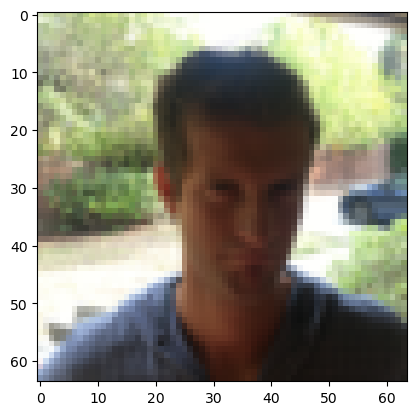

In [13]:
index = 11
plt.imshow(X_train[index])
plt.show()

In [14]:
Y_train[index]

array([0], dtype=int64)

In [15]:
classes

array([0, 1], dtype=int64)

<a id="forward_prop"></a>
<h2>Forward Propagation (happyMdel)</h2>
This model basically structured as follows

`ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> DROPOUT -> FLATTEN -> DENSE`

In [16]:
def happyModel(padding, input_shape, conv2d_filter_size=[32], kernel_size=5, strides=1):
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Arguments:
    padding -- integer padding for ZeroPadding2D layer
    input_shape -- tuple with the dimension of the input matrix
    filter_size -- number of finters for Conv2D layer
    kernel_size -- kernel size for Conv2D layer
    strides -- strides for Conv2D layer
    
    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """
    
    model = tf.keras.Sequential([
        tfl.ZeroPadding2D(padding=3, input_shape=(64, 64, 3)),
        tfl.Conv2D(filters=conv2d_filter_size[0], kernel_size=(5, 5), activation='relu'),
        #tfl.Conv2D(filters=conv2d_filter_size[1], kernel_size=(5, 5), activation='relu'),
        #tfl.Conv2D(filters=conv2d_filter_size[2], kernel_size=(5, 5), activation='relu'),
        #tfl.BatchNormalization(axis=3),
        tfl.ReLU(),
        tfl.MaxPool2D(),
        tfl.Dropout(0.2),
        tfl.Flatten(),
        tfl.Dense(1, activation='sigmoid')
    ])
    
    return model

The model is created.
<a id="compile_model"></a>
<h2>Compile the model</h2>
In Tensorflow we need to compile our model before we train our data on it.

We need to provide few basic required parameters as follows.
<ul>
    <li>an <b>optimizer</b>
    <li><b>loss</b> function
    <li>accurecy <b>metrics</b> (MSE, MAE, MAPE, ...)
</ul>
Here I use string `'accuracy'` as metrics parameter, then Keras will deside most suitable accuracy metric based on the loss function.

In [17]:
input_shape = (X_train_shape[1], X_train_shape[2], X_train_shape[3])

happy_model = happyModel(padding=3, input_shape=input_shape)

happy_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Let's check the model parameters with the `.summary()` method. This will display
- the type of laters
- the shape of the outputs
- parameter count in each layer

<a id="summary_of_the_model"></a>
<h2>Summary of the model</h2>

In [18]:
happy_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPadd  (None, 70, 70, 3)         0         
 ing2D)                                                          
                                                                 
 conv2d_1 (Conv2D)           (None, 66, 66, 32)        2432      
                                                                 
 re_lu_1 (ReLU)              (None, 66, 66, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 33, 33, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 33, 33, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 34848)            

<a id="train_and_evaluation"></a>
<h2>Train and Evaluation the model</h2>
<p>Now we can <b>fit()</b> the model. Parameters for the <b>.fit()</b> method will be, </p>
<ul>
    <li>train data - X_train in this case, 
    <li>relevant output labels - Y_train in this case,
    <li>epochs (number of iterations),
    <li>batch_size - mini batch size
</ul>

In [19]:
happy_model.fit(X_train, Y_train, epochs=30, batch_size=32)

Epoch 1/30
19/19 [==============================] - 1s 42ms/step - loss: 0.6892 - accuracy: 0.5883
Epoch 2/30
19/19 [==============================] - 1s 42ms/step - loss: 0.5357 - accuracy: 0.7600
Epoch 3/30
19/19 [==============================] - 1s 46ms/step - loss: 0.3981 - accuracy: 0.8650
Epoch 4/30
19/19 [==============================] - 1s 51ms/step - loss: 0.3078 - accuracy: 0.9117
Epoch 5/30
19/19 [==============================] - 1s 45ms/step - loss: 0.2621 - accuracy: 0.9100
Epoch 6/30
19/19 [==============================] - 1s 55ms/step - loss: 0.2176 - accuracy: 0.9183
Epoch 7/30
19/19 [==============================] - 1s 57ms/step - loss: 0.2008 - accuracy: 0.9367
Epoch 8/30
19/19 [==============================] - 1s 48ms/step - loss: 0.1662 - accuracy: 0.9550
Epoch 9/30
19/19 [==============================] - 1s 45ms/step - loss: 0.1549 - accuracy: 0.9517
Epoch 10/30
19/19 [==============================] - 1s 40ms/step - loss: 0.1376 - accuracy: 0.9600
Epoch 11/

Evaluate againt our test data.

In [20]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 10ms/step - loss: 0.1118 - accuracy: 0.9600


[0.11179433017969131, 0.9599999785423279]

<a id="save_model"></a>
<h2>Save model for future use</h2>

In [21]:
happy_model.save('happy_model.keras')

### Predict our own image
This function will convert uploaded image into the format that valid for our happy_model.

In [22]:
def imageToArray(imageName):
    # Load the image and resize it to the desired dimensions
    #image_path = f'images/{imageName}'
    image_path = f'images/happy/{imageName}'
    width, height = 64, 64

    image = Image.open(image_path)
    image = image.resize((width, height))
    print(image.width)
    # Convert the image to a NumPy array and normalize the pixel values (if necessary)
    image_array = np.asarray(image)
    image_array = image_array / 255.  # Normalize the pixel values between 0 and 1
    
    plt.imshow(image_array)
    plt.show()

    print(image_array.shape)
    # Reshape the image array to match the input shape of your model
    image_array = image_array.reshape(1, width, height, 3)  # Assumes the input shape is (width, height, 3)

    return image_array

64


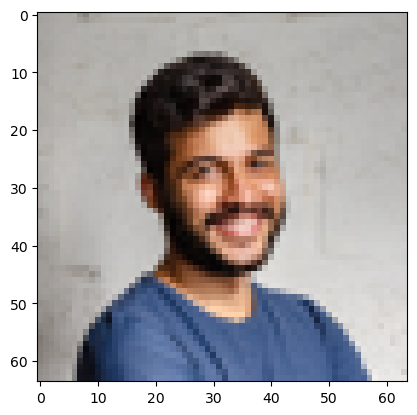

(64, 64, 3)
1/1 [==============================] - 0s 15ms/step
4.jpg Happy [[0.6337831]]


In [27]:
input_images = ['4.jpg']

class_strings = ['Sad', 'Happy']

for img in input_images:
    img_arr = imageToArray(img)
    predicted = happy_model.predict(img_arr)
    
    pred = int(predicted > 0.5) 
    print(img, class_strings[pred], predicted)